<left><img width=25% src="https://kuleshov-group.github.io/aml-resources/img/cornell_tech2.svg"></left>

# Lecture 1: Introduction to Machine Learning

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Welcome to Applied Machine Learning!

Machine learning is one of today's most exciting emerging technologies.

In this course, you will learn what machine learning is, what are the most important techniques in machine learning, and how to apply them to solve problems in the real world.

# Part 1: What is Machine Learning?

We hear a lot about machine learning (or ML for short) in the news.

<table><tr>
    <td><center><img src="https://kuleshov-group.github.io/aml-resources/img/breakthrough.jpg"/></center></td>
    <td><center><img width=90% src="https://kuleshov-group.github.io/aml-resources/img/alphago.jpeg"/></center></td>
    <td><center><img src="https://kuleshov-group.github.io/aml-resources/img/obama2.jpg"/></center></td>    
</tr></table>    

But what is it, really?

# ML in Everyday Life: Search Engines

You use machine learninng every day when you run a search engine query.

<center><img src="https://kuleshov-group.github.io/aml-resources/img/google.png"/></center>

# ML in Everyday Life: Personal Assitants

Machine learning also powers the speech recognition, question answering and other intelligent capabilities of smartphone assistants like Apple Siri.
<table><tr>
    <td><center><img src="https://kuleshov-group.github.io/aml-resources/img/siri.png"/></center></td>
    <td><center><img src="https://kuleshov-group.github.io/aml-resources/img/google_assistant.png"/></center></td>
</tr></table>    

# ML in Everyday Life: Spam/Fraud Detection

Machine learning is used in every spam filter, such as in Gmail.
<br>
<center><img src="https://kuleshov-group.github.io/aml-resources/img/spam.png"/></center>

ML systems are also used by credit card companies and banks to automatically detect fraudulent behavior.

# ML in Everyday Life: Self-Driving Cars

One of the most exciting and cutting-edge uses of machine learning algorithms are in autonomous vehicles.

<center><img width="80%" src="https://kuleshov-group.github.io/aml-resources/img/waymo.jpg"/></center>

# A Definition of Machine Learning

In 1959, Arthur Samuel defined machine learning as follows.

> Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed.

What does "learn" and "explicitly programmed" mean here? Let's look at an example.

# An Example: Self Driving Cars

A self-driving car system uses dozens of components that include detection of cars, pedestrians, and other objects.
<br>
<center><img width=80% src="https://kuleshov-group.github.io/aml-resources/img/tesla.jpg"/></center>

# Self Driving Cars: A Rule-Based Algorithm

One way to build a detection system is to write down rules.
<left><img width=50% src="https://kuleshov-group.github.io/aml-resources/img/tesla_zoom.jpg"/></left>

<!-- <table style="border: 1px"><tr>
    <td><left>One way to build a detection system is to write down rules.</left></td>
    <td><img src="img/tesla_zoom.jpg"/></td>
</tr></table> -->

In [ ]:
# pseudocode example for a rule-based classification system
object = camera.get_object()
if object.has_wheels(): # does the object have wheels?
    if len(object.wheels) == 4: return "Car" # four wheels => car    
    elif len(object.wheels) == 2:,
        if object.seen_from_back():
            return "Car" # viewed from back, car has 2 wheels
        else:
            return "Bicycle" # normally, 2 wheels => bicycle
return "Unknown" # no wheels? we don't know what it is

In practice, it's almost impossible for a human to specify all the edge cases.

# Self Driving Cars: An ML Approach

The machine learning approach is to teach a computer how to do detection by showing it many examples of different objects.

<center><img src="https://kuleshov-group.github.io/aml-resources/img/tesla_data.png"/></center>

No manual programming is needed: the computer learns what defines a pedestrian or a car on its own!

# Revisiting Our Definition of ML

> Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed. (Arthur Samuel, 1959.)

This principle can be applied to countless domains:
medical diagnosis, factory automation, machine translation, and many more!

# Why Machine Learning?

Why is this approach to building software interesting?

* It allows building practical systems for real-world applications that couldn't be solved otherwise.

* Learning is wildly regarded as a key approach towards building general-purpose artificial intelligence systems.

* The science and engineering of machine learning offers insights into human intelligence.

<left><img width=25% src="https://kuleshov-group.github.io/aml-resources/img/cornell_tech2.svg"></left>
# Part 2: Three Approaches to Machine Learning

Machine learning is broadly defined as the science of building software that has the ability to learn without being explicitly programmed.

How might we enable machines to learn? Let's look at a few examples.

# Supervised Learning

The most common approach to machine learning is supervised learning.

<center><img width=70% src="https://kuleshov-group.github.io/aml-resources/img/tesla_data.png"/></center>

1. First, we collect a dataset of labeled training examples.
2. We train a model to output accurate predictions on this dataset.
3. When the model sees new, similar data, it will also be accurate.

# A Supervised Learning Dataset

Consider a simple dataset for supervised learning: house prices in  
* Each datapoint is a house.
* We know its price, neighborhood, size, etc.

In [4]:
# We will load the dataset from the sklearn ML library
from sklearn import datasets
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

We will visualize two variables in this dataset: house price and the education level in the neighborhood.

Text(0.5, 1.0, 'House prices as a function of average neighborhood education level')

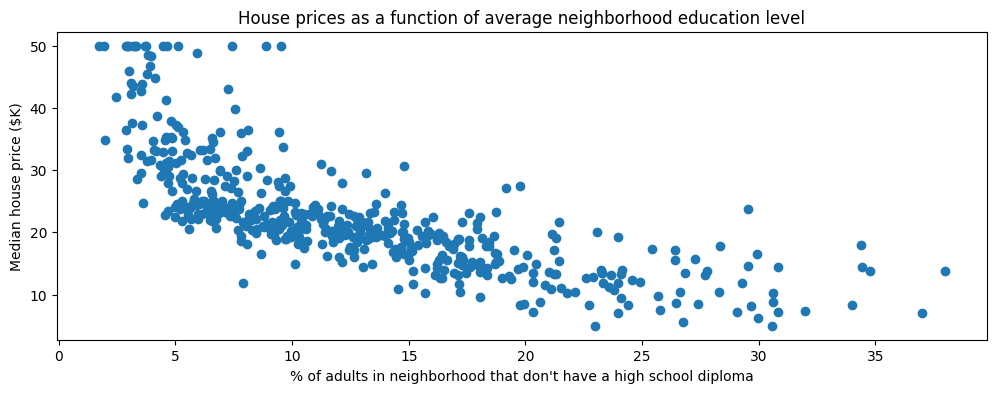

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
plt.scatter( data[:,12],  target)
plt.ylabel("Median house price ($K)")
plt.xlabel("% of adults in neighborhood that don't have a high school diploma")
plt.title("House prices as a function of average neighborhood education level")

# A Supervised Learning Algorithm

We can use this dataset of examples to fit a supervised learning model.

* The model maps input $x$ (the education level) to output a $y$ (the house price).
* It learns the mapping from our dataset of examples $(x, y)$.

Text(0.5, 1.0, 'House prices as a function of average neighborhood education level')

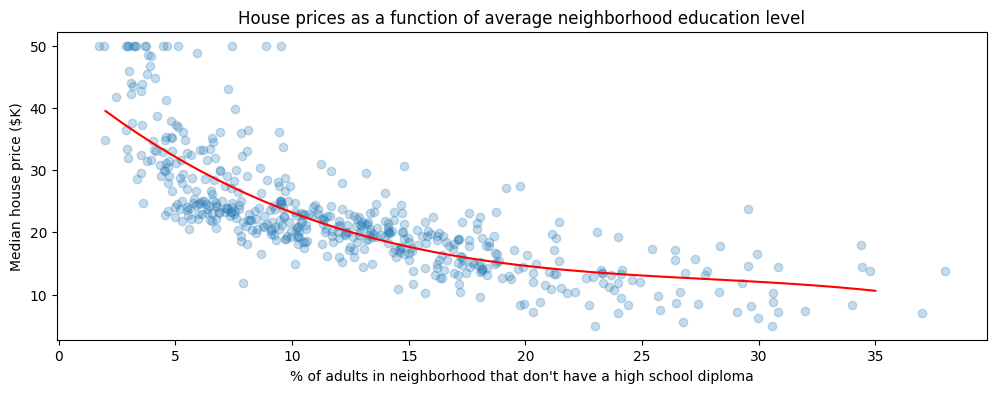

In [7]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge

# Apply a supervised learning algorithm
model = KernelRidge(alpha=1, kernel='poly')
model.fit( data[:,[12]],  target.flatten())
predictions = model.predict(np.linspace(2, 35)[:, np.newaxis])

# Visualize the results
plt.scatter( data[:,[12]],  target, alpha=0.25)
plt.plot(np.linspace(2, 35), predictions, c='red')
plt.ylabel("Median house price ($K)")
plt.xlabel("% of adults in neighborhood that don't have a high school diploma")
plt.title("House prices as a function of average neighborhood education level")

# Applications of Supervised Learning

Many of the most important applications of machine learning are supervised:
* Classifying medical images.
* Translating between pairs of languages.
* Detecting objects in a self-driving car.

# Unsupervised Learning

Here, we have a dataset *without* labels. Our goal is to learn something interesting about the structure of the data:
* Clusters hidden in the dataset.
* Outliers: particularly unusual and/or interesting datapoints.
* Useful signal hidden in noise, e.g. human speech over a noisy phone.

# An Unsupervised Learning Dataset

Here is a simple example of an unsupervised learning dataset: Iris flowers.

Text(0.5, 1.0, 'Dataset of Iris flowers')

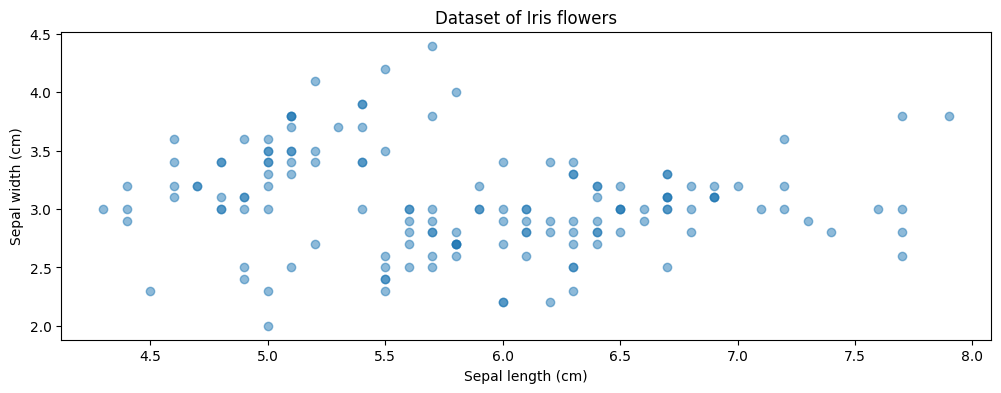

In [8]:
# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")

# An Unsupervised Learning Algorithm

We can use this dataset of examples to fit an unsupervised learning model.
* The model defines a probability distribution over the inputs.
* The probability distribution identifies multiple components (multiple peaks).
* The components indicate structure in the data.

In [9]:
# fit a Gaussian Mixture Model with three components
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model.fit(iris.data[:,[0,1]])

GaussianMixture(n_components=3)

In [10]:
model.means_

array([[6.69135935, 3.03010885],
       [5.90637066, 2.74742043],
       [5.01509042, 3.45136929]])

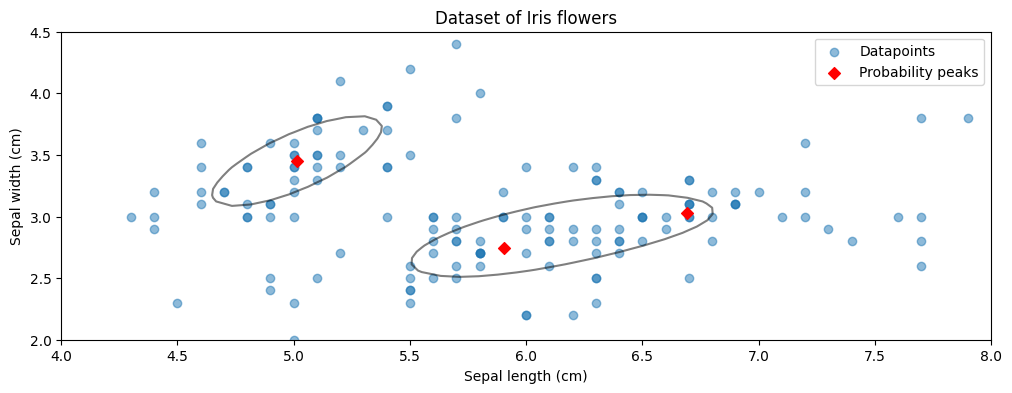

In [11]:
# display learned probabilities as a contour plot
x, y = np.linspace(4.0, 8.0), np.linspace(2.0, 4.5)
X, Y = np.meshgrid(x, y)
Z = -model.score_samples(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape)
plt.contour(X, Y, Z, levels=np.logspace(0, 10, 1), cmap="gray", alpha=0.5)
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(['Datapoints', 'Probability peaks'])

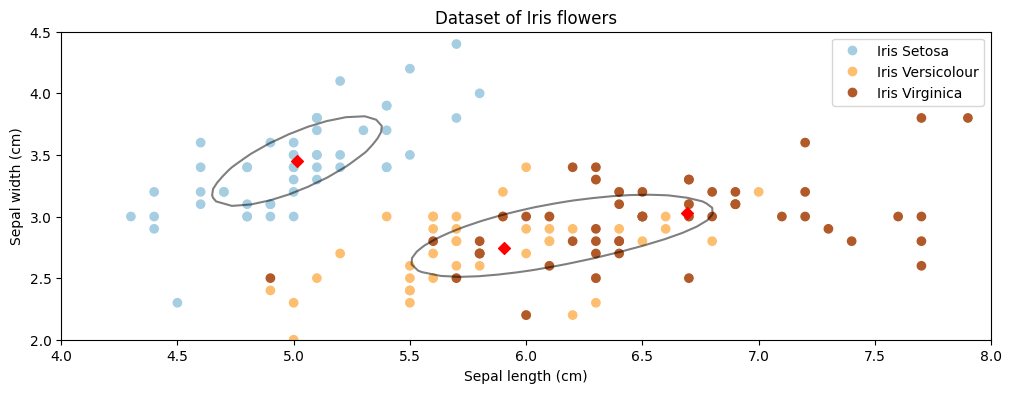

In [12]:
CS = plt.contour(X, Y, Z, levels=np.logspace(0, 30, 1), cmap='gray', alpha=0.5)
p1 = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=1, c=iris.target, cmap='Paired')
plt.scatter(model.means_[:,0], model.means_[:,1], marker='D', c='r')
plt.ylabel("Sepal width (cm)")
plt.xlabel("Sepal length (cm)")
plt.title("Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

# Applications of Unsupervised Learning

Unsupervised learning also has numerous applications:
* Recommendation systems: suggesting movies on Netflix.
* Anomaly detection: identifying factory components that are likely to break soon.
* Signal denoising: extracting human speech from a noisy recording.

# Reinforcement Learning

In reinforcement learning, an agent is interacting with the world over time. We teach it good behavior by providing it with rewards.

<center><img src="https://kuleshov-group.github.io/aml-resources/img/rl.png"/></center>

<sub><sup>Image by Lily Weng</sup></sub>

# Applications of Reinforcement Learning

Applications of reinforcement learning include:
* Creating agents that play games such as Chess or Go.
* Controling the cooling systems of datacenters to use energy more efficiently.
* Designing new drug compounds.

# Artificial Intelligence and Deep Learning

Machine learning is often discussed in the context of these two fields.
* AI is about building machines that exhibit intelligence.
* ML enables machines to learn from experience, a useful tool for AI.
* Deep learning focuses on a family of learning algorithms loosely inspired by the brain.
<center><img width="50%" src="https://kuleshov-group.github.io/aml-resources/img/ai_ml_dl.png"/></center>

<sub><sup>Image [source](https://towardsdatascience.com/understanding-the-difference-between-ai-ml-and-dl-cceb63252a6c).</sup></sub>

<left><img width=25% src="https://kuleshov-group.github.io/aml-resources/img/cornell_tech2.svg"></left>
# Part 3: About the Course

Next, let's look at the machine learning topics that we will cover.

# Teaching Approach

The focus of this course is on applied machine learning.
* We will cover a broad toolset of core algorithms from many different subfields of ML.
* We will emphasize applications and show how to implement and apply algorithms via examples and exercises.

<!-- 1. We will cover a breadth of machine learning topics. We will not focus on just one subfield, like deep learning.
2. The focus will be on ML algorithms and why they work. All the fundamental ML algorithms will be seen.
3. We will emphasize applications over theory. We will cover in detail how to implement and apply ML algorithms in practice. -->

Why are we following this approach?
* Applying machine learning is among the most in demand industry skills right now.
* There can be a gap between theory and practice, especially in modern machine learning.
* Often, the best way of understanding how an algorithm works is to implement it.

# What You Will Learn

* What are the core algorithms of ML and how to define them in mathematical language.
* How to implement algorithms from scratch as well as using ML libraries and apply them to problems in computer vision, language processing, medical analysis, and more.
* Why machine learning algorithms work and how to use that knowledge to debug and improve them.

# Software You Will Use

You will use Python and popular machine learning libraries such as:
  * `scikit-learn`. It implements most classical machine learning algorithms.
  * `tensorflow`, `keras`, `pytorch`. Standard libraries for modern deep learning.
  * `numpy`, `pandas`. Linear algebra and data processing libraries used to implement algorithms from scratch.

# Executable Course Materials

The core materials for this course (including the slides!) are created using Jupyter notebooks.
* We are going to embed an execute code directly in the slides and use that to demonstrate algorithms.
* These slides can be downloaded locally and all the code can be reproduced.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk 
from sklearn import datasets, neural_network
plt.rcParams['figure.figsize'] = [12, 4]

We can use these libraries to load a simple datasets of handwritten digits.

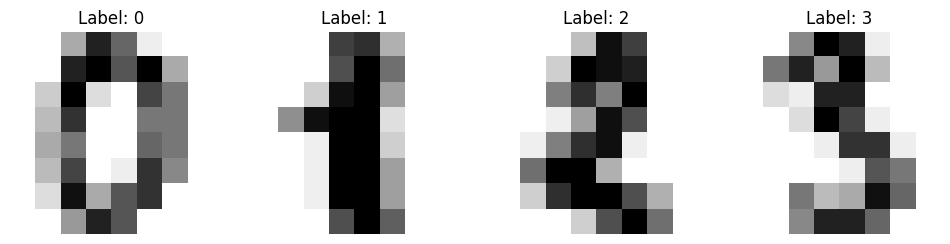

In [14]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# load the digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images.
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)

We can now load and train this algorithm inside the slides.

In [18]:
np.random.seed(0)
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data = digits.images.reshape((len(digits.images), -1))

# create a small neural network classifier
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(alpha=1e-3)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

We can now visualize the results.

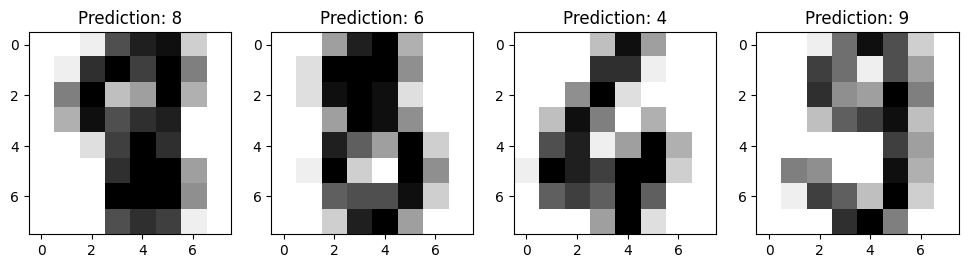

In [20]:
n_samples = len(digits.images)
_, axes = plt.subplots(1, 4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

<left><img width=25% src="https://kuleshov-group.github.io/aml-resources/img/cornell_tech2.svg"></left>
# Part 4: Logistics and Other Information

We will go over some practical bits of information.

# Course Format: Reverse Classrom

The format of this course will be that of the "reverse classroom".
* Pre-recorded lecture videos will be made available online ahead of time. You should watch them ahead of each weekly lecture.
* In-class discussions will focus on answering student questions, going over homework problems, doing tutorials.

# Course Content

The course spans about 25 lectures approximately divided up into a set of blocks:
1. Supervised and unsupervised algorithms.
2. Foundations of machine learning.
4. Applying machine learning in practice.
5. Advanced topics and guest lectures.

# Machine Learning Algorithms

* Supervised learning algorithms: linear models and extensions, kernel machines, tree-based algorithms.
* Unsupervised learning algorithms: density estimation, clustering, dimensionality reduction
* Introduction to deep learning models.

<!-- * Linear algorithms and their extensions.
* Probabilistic interpretations and generative models.
* Support vector machines and kernels.
* Decision tress and boosting algorithms.
* Introduction to deep learning methods. -->

<!-- * Principles of unsupervised learning and density estimation.
* Clustering algorithms. Mixture models.
* Dimensionality reduction.
* Probabilistic interpretations. -->

# Foundations of Machine Learning

* The basic language of machine learning: datasets, features, models, objective functions.
* Tools for machine learning: optimization, probability, linear algebra. 
* Why do algorithms work in practice? Probabilistic and statistical foundations.

# Applying Machine Learning

* Evaluating machine learning algorithms.
* Diagnosing and debugging performance.
* Analyzing errors and improving models.
* Deploying and debugging pipelines.

# Advanced Machine Learning Topics

* Introduction to reinforcement learning
* Guest lectures from industry

# Course Assignments

There are two main types of assignments.
1. Supervised and unsupervised algorithms.
2. Foundations of machine learning.
4. Applying machine learning in practice.
5. Advanced topics and guest lectures.

# Prerequisites. Is This Course For You?

This course is designed to aimed at a very general technical audience. Main requirements are:
* Programming experience (at least 1 year), preferably in Python.
* College-level linear algebra. Matrix operations, the SVD decomposition, etc.
* College-level probability. Probability distributions, random variables, Bayes' rule, etc.

# Other Logistics

* The majority of course materials will be accessible online.
* Grading will be based on a combination of homework assignments and course projects. See website for more details.
* There is no required textbook, but we recommend Elements of Statistical Learning by Hastie, Tibshirani, and Friedman.

### Again, Welcome to Applied Machine Learning!
<left><img width=25% src="https://kuleshov-group.github.io/aml-resources/img/cornell_tech2.svg"></left>